In [1]:
import pandas as pd
from util.util import *
from transformers import AutoTokenizer
import random
from torch.utils.data import DataLoader
import torch
import torch.nn as nn
import torch.optim as optim
# import torch.utils.data as data
# from util.node import TransformerM
from torch.optim.lr_scheduler import StepLR,CosineAnnealingLR
# import math
# import copy

/usr/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import pandas as pd

In [4]:
import numpy as np

In [77]:
random.randrange(1,10,1)

5

In [79]:
[1,2,3,4][0:4]

[1, 2, 3, 4]

In [2]:
tokenizer = AutoTokenizer.from_pretrained("gpt2")

In [3]:
def tokenizerL(text):
    words_with_offsets = tokenizer.backend_tokenizer.pre_tokenizer.pre_tokenize_str(text)
    new_words = [word for word, offset in words_with_offsets]
    return new_words

In [41]:
tokenizerL("qwertyuiop[]asdfghjkl;'zxcvbnm,./")

['qwertyuiop', '[]', 'asdfghjkl', ";'", 'zxcvbnm', ',./']

In [42]:
tokenizerL("1234567890-=")

['1234567890', '-=']

In [ ]:
tokenizerL(" ! @ # $ % ^ & * ( ) _ + Q W E R T Y U  I O P { } A S D F G H J K L : " " Z X C V B N M < > ? | ")

In [47]:
tokenizerL(" ")

['Ġ']

In [48]:
tokenizerL("\n")

['Ċ']

In [4]:
question = []
answer = []
all_data = []

In [5]:
data = pd.read_csv("data/WikiQACorpus/WikiQA-train.tsv", chunksize=10000,sep="\t")
for d in data:
    question += d["Question"].tolist()
    answer += d["Sentence"].tolist()
all_data = question + answer

In [ ]:
data = pd.read_csv("./data/question_and_answer_no_code01/Dataset_Python_Question_Answer.csv", chunksize=10000)
for d in data:
    question += d["Question"].tolist()
    ans = d["Answer"].map(lambda x: "\n".join(eval(x))).tolist()
    answer += ans
all_data = question + answer

In [6]:
question[:10]

['how are glacier caves formed?',
 'how are glacier caves formed?',
 'how are glacier caves formed?',
 'how are glacier caves formed?',
 'how are glacier caves formed?',
 'How are the directions of the velocity and force vectors related in a circular motion',
 'How are the directions of the velocity and force vectors related in a circular motion',
 'How are the directions of the velocity and force vectors related in a circular motion',
 'How are the directions of the velocity and force vectors related in a circular motion',
 'How are the directions of the velocity and force vectors related in a circular motion']

In [7]:
answer[:10]

['A partly submerged glacier cave on Perito Moreno Glacier .',
 'The ice facade is approximately 60 m high',
 'Ice formations in the Titlis glacier cave',
 'A glacier cave is a cave formed within the ice of a glacier .',
 'Glacier caves are often called ice caves , but this term is properly used to describe bedrock caves that contain year-round ice.',
 'In physics , circular motion is a movement of an object along the circumference of a circle or rotation along a circular path.',
 'It can be uniform, with constant angular rate of rotation (and constant speed), or non-uniform with a changing rate of rotation.',
 'The rotation around a fixed axis of a three-dimensional body involves circular motion of its parts.',
 'The equations of motion describe the movement of the center of mass of a body.',
 'Examples of circular motion include: an artificial satellite orbiting the Earth at constant height, a stone which is tied to a rope and is being swung in circles, a car turning through a curve 

In [3]:
vocab_size = 1024*2

In [4]:
bpe = BPE()

In [5]:
bpe.idx2token

<bound method BPE.idx2token of <util.util.BPE object at 0x75f903cf0c80>>

In [5]:
bpe.load_pretrain("model/BPE_model/BPE_model_code_python01.pkl")

In [8]:
bpe.train(all_data,vocab_size=vocab_size)

count word freq


100%|██████████| 40694/40694 [00:00<00:00, 49514.93it/s] 


find alphabet


100%|██████████| 2048/2048 [01:57<00:00, 17.43it/s] 


In [12]:
bpe.save_model("model/BPE_model/BPE_model_code_python04.pkl")

In [11]:
bpe.vocab[1900:]

['Ġallow',
 'Ġforces',
 'Ġmoun',
 'ged',
 'Ġassoc',
 'Ġestim',
 'Ġdeterm',
 'Ġcame',
 'Ġturn',
 'Ġsport',
 'ĠBr',
 'aster',
 'hod',
 'Ġfield',
 'Ġimportant',
 'icro',
 'Ġ13',
 'eptember',
 'Ġgenerally',
 'Ġmovie',
 'ingu',
 'ids',
 'Ġspace',
 'ma',
 'Ġ30',
 'ait',
 'Ġfull',
 'Ġmark',
 'Ġ1990',
 'Ġanother',
 'ications',
 'These',
 'ĠAustral',
 'Ġchildren',
 'ological',
 'Ġrese',
 'ison',
 'Ġhydro',
 'ille',
 'Ġexist',
 'Ġchem',
 'Ġtechnology',
 'Ġpat',
 'born',
 'Ġfire',
 'Ġprofessional',
 'Ġfilms',
 'ulf',
 'ivision',
 'Ġmanag',
 'uck',
 '10',
 'ential',
 'sp',
 'Ġprimary',
 'Ġsignificant',
 'side',
 'ĠAt',
 'Ġsum',
 'aren',
 'Ġculture',
 'Ġtest',
 'Ġnovel',
 'Ġprevious',
 'Ġdeep',
 'Ġauthor',
 'Ġproperty',
 'Ġhold',
 'ves',
 'aper',
 'line',
 'Ġ&',
 'Ġapp',
 'ending',
 'adem',
 'Ġcurrently',
 'Ġaver',
 'Ġestablished',
 'imately',
 'ither',
 'ĠSeptember',
 'Ġtradition',
 'Ġrecorded',
 'lant',
 'Ġpar',
 'avery',
 'Ġstill',
 'Ġreceived',
 'Ġhit',
 'ĠIS',
 'Ġcauses',
 'ady',
 'Ġhand',
 'Ġ

In [9]:
len(bpe.vocab)

2048

In [33]:
decode = "".join(bpe.tokenize(answer[100])).replace("Ġ"," ").replace("Ċ","\n")

In [34]:
print(decode)

RS-68 being tested at NASA's Stennis Space Center.


In [11]:
print(answer[0])

Sure, here's the difference between a variable and an object:
**Variable:**
* A variable is a named memory location that stores a single value.
* It is a placeholder for a specific amount of data.
* Variables can hold different values throughout the program.
* They are declared using the `=` operator and assigned a value.
**Object:**
* An object is a complex data structure that contains data and methods.
* It is an instance of a class.
* Objects can have multiple variables and methods associated with them.
* They are created using the `new` keyword and contain a copy of all the variables and methods of the class.
In summary, a variable is a single piece of memory that stores a single value, while an object is a complex data structure that contains data and methods.


In [25]:
a1 = tokenizerL(answer[0])

In [23]:
tt = """Sure, here's the difference between a variable and an object:
**Variable:**
* A variable is a named memory location that stores a single value.
* It is a placeholder for a specific amount of data.
* Variables can hold different values throughout the program.
* They are declared using the `=` operator and assigned a value.
**Object:**
* An object is a complex data structure that contains data and methods.
* It is an instance of a class.
* Objects can have multiple variables and methods associated with them.
* They are created using the `new` keyword and contain a copy of all the variables and methods of the class.
In summary, a variable is a single piece of memory that stores a single value, while an object is a complex data structure that contains data and methods."""

In [26]:
a2 = tokenizerL(tt)

In [27]:
a1 == a2

True

In [6]:
train_data = dataloadercustom()

In [7]:
len(train_data)

419

In [8]:
train_dataloader = DataLoader(train_data,batch_size=64,shuffle=True)

In [9]:
qq,aa_1,aa_2 = next(iter(train_data))

In [13]:
"".join(bpe.idx2token(qq[:].cpu().tolist())).replace("Ġ"," ").replace("Ċ","\n")

'<|startoftext|> What is the difference between a variable and an object?<|endoftext|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|>'

In [15]:
print("".join(bpe.idx2token(aa_1[:].cpu().tolist())).replace("Ġ"," ").replace("Ċ","\n"))

<|startoftext|>Sure, here's the difference between a variable and an object:
**Variable:**
* A variable is a named memory location that stores a single value.
* It is a placeholder for a specific amount of data.
* Variables can hold different values throughout the program.
* They are declared using the `=` operator and assigned a value.
**Object:**
* An object is a complex data structure that contains data and methods.
* It is an instance of a class.
* Objects can have multiple variables and methods associated with them.
* They are created using the `new` keyword and contain a copy of all the variables<|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|

In [16]:
print("".join(bpe.idx2token(aa_2[:].cpu().tolist())).replace("Ġ"," ").replace("Ċ","\n"))

<|startoftext|>Sure, here's the difference between a variable and an object:
**Variable:**
* A variable is a named memory location that stores a single value.
* It is a placeholder for a specific amount of data.
* Variables can hold different values throughout the program.
* They are declared using the `=` operator and assigned a value.
**Object:**
* An object is a complex data structure that contains data and methods.
* It is an instance of a class.
* Objects can have multiple variables and methods associated with them.
* They are created using the `new` keyword and contain a copy of all the variables and<|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|

In [2]:
import pandas as pd
from util.util import *
from transformers import AutoTokenizer
import random
from torch.utils.data import DataLoader

In [2]:
train_data = dataloadercustom()
train_dataloader = DataLoader(train_data,batch_size=64,shuffle=True)

In [3]:
class WarmupCosineScheduler:
    def __init__(self, optimizer, warmup_steps, max_steps, base_lr):
        self.optimizer = optimizer
        self.warmup_steps = warmup_steps
        self.max_steps = max_steps
        self.base_lr = base_lr
        self.cosine_scheduler = CosineAnnealingLR(optimizer, T_max=(max_steps - warmup_steps))
        self.current_step = 0

    def step(self):
        if self.current_step < self.warmup_steps:
            # Linear warmup
            lr = self.base_lr * (self.current_step / self.warmup_steps)
            for param_group in self.optimizer.param_groups:
                param_group['lr'] = lr
        else:
            # Cosine annealing
            self.cosine_scheduler.step()
        
        self.current_step += 1

# # Example usage
# model = torch.nn.Linear(10, 1)  # Simple linear model
# optimizer = Adam(model.parameters(), lr=0.001)  # Base learning rate
# warmup_steps = 500
# max_steps = 5000
# scheduler = WarmupCosineScheduler(optimizer, warmup_steps, max_steps, base_lr=0.001)

# # Training loop
# for epoch in range(num_epochs):
#     for batch in dataloader:
#         # Training step
#         optimizer.zero_grad()
#         output = model(batch)
#         loss = loss_fn(output, batch)
#         loss.backward()
#         optimizer.step()
        
#         # Update learning rate
#         scheduler.step()

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
# import torch.utils.data as data
from util.node import Transformer
from torch.optim.lr_scheduler import StepLR,CosineAnnealingLR
# import math
# import copy

# data loader
train_data = dataloadercustom()
train_dataloader = DataLoader(train_data,batch_size=64,shuffle=True)

src_vocab_size = train_data.token_size
tgt_vocab_size = train_data.token_size
d_model = 128*3
num_heads = 6*1
num_layers = 6*1
d_ff = 2048//8
max_seq_length = train_data.window_size
dropout = 0.1

transformer = Transformer(src_vocab_size, tgt_vocab_size, d_model,
                          num_heads, num_layers, d_ff, max_seq_length, dropout, device=0).to(device=0)

# Generate random sample data
# (batch_size, seq_length)
src_data = torch.randint(
    1, src_vocab_size, (64//8, max_seq_length)).to(device=0)
# (batch_size, seq_length)
tgt_data = torch.randint(
    1, tgt_vocab_size, (64//8, max_seq_length)).to(device=0)

criterion = nn.CrossEntropyLoss(ignore_index=0).to(device=0)
optimizer = optim.Adam(transformer.parameters(),
                       lr=0.001, betas=(0.9, 0.95), eps=1e-9)

# Learning rate scheduler
warmup_steps = 500
max_steps = 5000
scheduler = WarmupCosineScheduler(optimizer, warmup_steps, max_steps, base_lr=0.001)
# scheduler = StepLR(optimizer, step_size=20, gamma=0.5)
# scheduler = CosineAnnealingWarmRestarts(optimizer=optimizer, )

transformer.train()

for epoch in tqdm(range(1)):
    for question, answer_in, answer_out in tqdm(train_dataloader):
        optimizer.zero_grad()
        output = transformer(question, answer_in)
        loss = criterion(output.contiguous().view(-1, tgt_vocab_size),
                         answer_out.contiguous().view(-1))
        loss.backward()
        optimizer.step()
        scheduler.step()
        print(f"Epoch: {epoch+1}, Loss: {loss.item()}")


In [13]:
from datasets import load_dataset
ds = load_dataset("microsoft/wiki_qa")

Generating train split: 100%|██████████| 20360/20360 [00:00<00:00, 948138.93 examples/s]


In [17]:
ds["train"][0]["question"]

'how are glacier caves formed?'

In [1]:
import torch
from util.node import *
from matplotlib import pyplot as plt

In [2]:
posi = PositionalEncoding(100,1000)

In [4]:
seq = torch.zeros(8,1000, 100)
b = posi(seq)

In [8]:
b[0,0]

tensor([0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
        0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
        0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
        0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
        0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
        0., 1., 0., 1., 0., 1., 0., 1., 0., 1.])

In [9]:
b[0,1]

tensor([8.4147e-01, 5.4030e-01, 7.3912e-01, 6.7357e-01, 6.3795e-01, 7.7008e-01,
        5.4420e-01, 8.3895e-01, 4.6056e-01, 8.8763e-01, 3.8767e-01, 9.2180e-01,
        3.2511e-01, 9.4568e-01, 2.7195e-01, 9.6231e-01, 2.2709e-01, 9.7387e-01,
        1.8940e-01, 9.8190e-01, 1.5783e-01, 9.8747e-01, 1.3144e-01, 9.9132e-01,
        1.0943e-01, 9.9399e-01, 9.1075e-02, 9.9584e-01, 7.5785e-02, 9.9712e-01,
        6.3054e-02, 9.9801e-01, 5.2457e-02, 9.9862e-01, 4.3638e-02, 9.9905e-01,
        3.6300e-02, 9.9934e-01, 3.0195e-02, 9.9954e-01, 2.5116e-02, 9.9968e-01,
        2.0891e-02, 9.9978e-01, 1.7377e-02, 9.9985e-01, 1.4454e-02, 9.9990e-01,
        1.2022e-02, 9.9993e-01, 9.9998e-03, 9.9995e-01, 8.3175e-03, 9.9997e-01,
        6.9183e-03, 9.9998e-01, 5.7544e-03, 9.9998e-01, 4.7863e-03, 9.9999e-01,
        3.9811e-03, 9.9999e-01, 3.3113e-03, 9.9999e-01, 2.7542e-03, 1.0000e+00,
        2.2909e-03, 1.0000e+00, 1.9055e-03, 1.0000e+00, 1.5849e-03, 1.0000e+00,
        1.3183e-03, 1.0000e+00, 1.0965e-

In [10]:
b[0,2]

tensor([ 9.0930e-01, -4.1615e-01,  9.9570e-01, -9.2598e-02,  9.8254e-01,
         1.8604e-01,  9.1312e-01,  4.0768e-01,  8.1762e-01,  5.7576e-01,
         7.1471e-01,  6.9942e-01,  6.1490e-01,  7.8860e-01,  5.2341e-01,
         8.5208e-01,  4.4231e-01,  8.9686e-01,  3.7193e-01,  9.2826e-01,
         3.1170e-01,  9.5018e-01,  2.6061e-01,  9.6544e-01,  2.1754e-01,
         9.7605e-01,  1.8139e-01,  9.8341e-01,  1.5113e-01,  9.8851e-01,
         1.2586e-01,  9.9205e-01,  1.0477e-01,  9.9450e-01,  8.7192e-02,
         9.9619e-01,  7.2552e-02,  9.9736e-01,  6.0362e-02,  9.9818e-01,
         5.0217e-02,  9.9874e-01,  4.1774e-02,  9.9913e-01,  3.4749e-02,
         9.9940e-01,  2.8905e-02,  9.9958e-01,  2.4043e-02,  9.9971e-01,
         1.9999e-02,  9.9980e-01,  1.6635e-02,  9.9986e-01,  1.3836e-02,
         9.9990e-01,  1.1509e-02,  9.9993e-01,  9.5725e-03,  9.9995e-01,
         7.9621e-03,  9.9997e-01,  6.6226e-03,  9.9998e-01,  5.5084e-03,
         9.9998e-01,  4.5817e-03,  9.9999e-01,  3.8

In [13]:
b[0,3]

tensor([ 1.4112e-01, -9.8999e-01,  6.0224e-01, -7.9832e-01,  8.7532e-01,
        -4.8354e-01,  9.8793e-01, -1.5490e-01,  9.9091e-01,  1.3450e-01,
         9.2997e-01,  3.6764e-01,  8.3788e-01,  5.4585e-01,  7.3541e-01,
         6.7762e-01,  6.3442e-01,  7.7299e-01,  5.4101e-01,  8.4102e-01,
         4.5775e-01,  8.8908e-01,  3.8525e-01,  9.2281e-01,  3.2304e-01,
         9.4638e-01,  2.7020e-01,  9.6280e-01,  2.2561e-01,  9.7422e-01,
         1.8816e-01,  9.8214e-01,  1.5679e-01,  9.8763e-01,  1.3058e-01,
         9.9144e-01,  1.0871e-01,  9.9407e-01,  9.0475e-02,  9.9590e-01,
         7.5285e-02,  9.9716e-01,  6.2638e-02,  9.9804e-01,  5.2110e-02,
         9.9864e-01,  4.3350e-02,  9.9906e-01,  3.6060e-02,  9.9935e-01,
         2.9995e-02,  9.9955e-01,  2.4950e-02,  9.9969e-01,  2.0753e-02,
         9.9978e-01,  1.7262e-02,  9.9985e-01,  1.4358e-02,  9.9990e-01,
         1.1943e-02,  9.9993e-01,  9.9338e-03,  9.9995e-01,  8.2626e-03,
         9.9997e-01,  6.8725e-03,  9.9998e-01,  5.7

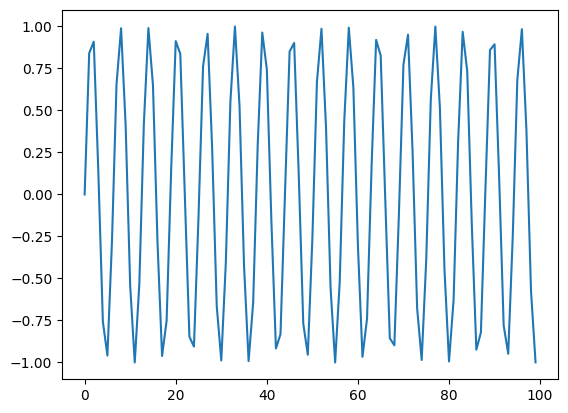

In [15]:
plt.plot(b[0,:100,0])

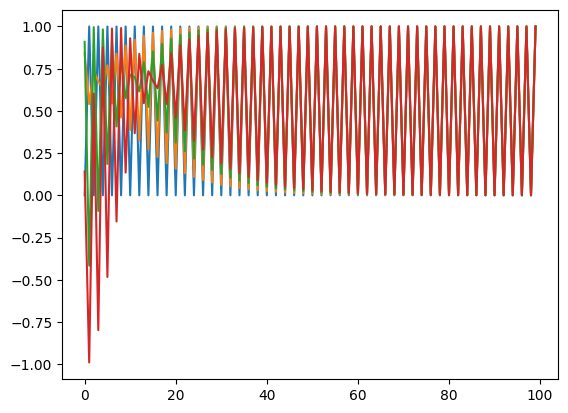

In [18]:
plt.plot(b[0,0,:])
plt.plot(b[0,1,:])
plt.plot(b[0,2,:])
plt.plot(b[0,3,:])

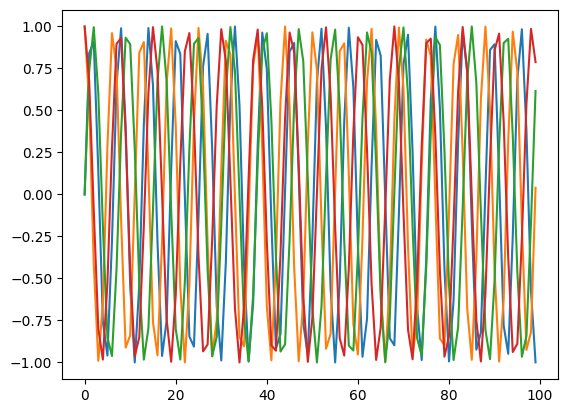

In [20]:
plt.plot(b[0,:100,0])
plt.plot(b[0,:100,1])
plt.plot(b[0,:100,2])
plt.plot(b[0,:100,3])

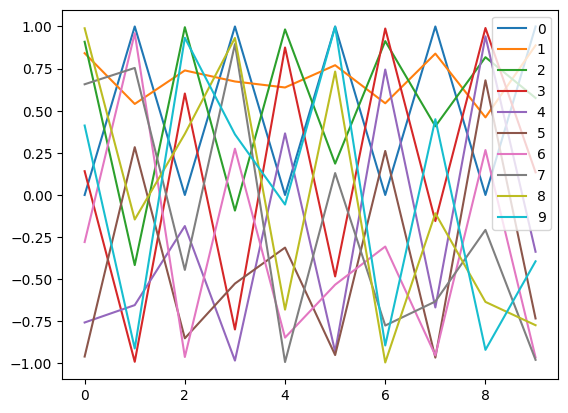

In [35]:
for i in range(10):
    plt.plot(b[0,i,:10],label = f"{i}")
    plt.legend()

In [8]:
with open("/home/athip/psu/learning_AI/Text_Gen/data/PythonCodeDataSmall_TextOnly/Python_code_data.txt","r") as f:
    code = f.readlines(-1)

In [9]:
code[110:150]

['\n',
 '\n',
 '# Write a program to filter the numbers in a list which are divisible by a given number\n',
 'my_list = [11, 45, 74, 89, 132, 239, 721, 21]\n',
 '\n',
 'num = 3\n',
 'result = list(filter(lambda x: (x % num == 0), my_list))\n',
 '\n',
 'print(f"Numbers divisible by {num} are {result}")\n',
 '\n',
 '\n',
 '# Write a python function that returns the sum of n natural numbers\n',
 'def sum_natural(num):\n',
 '    if num < 0:\n',
 '       print("Please enter a positive number!")\n',
 '    else:\n',
 '       sum = 0\n',
 '       while(num > 0):\n',
 '           sum += num\n',
 '           num -= 1\n',
 '       return num\n',
 '\n',
 '# Write a program to swap first and last elements in a list\n',
 'my_list = [1, 2, 3, 4, 5, 6]\n',
 'my_list[0], my_list[-1] = my_list[-1], my_list[0]\n',
 '\n',
 '\n',
 '# Write a python function to find the area of a circle, whose radius is given\n',
 'def findArea(r): \n',
 '    PI = 3.142\n',
 '    return PI * (r*r)\n',
 '\n',
 '\n',
 '# Writ

In [6]:
vocab_size = 1024*1

In [7]:
bpe = BPE()

In [10]:
bpe.train(code,vocab_size)

count word freq


100%|██████████| 42745/42745 [00:00<00:00, 100529.90it/s]


find alphabet


100%|██████████| 1024/1024 [00:08<00:00, 119.95it/s]


In [11]:
bpe.save_model("model/BPE_model/BPE_model_code_python_small_text_N01_1K.pkl")

In [18]:
bpe.load_pretrain("model/BPE_model/BPE_model_code_python_small_text_N01_1K.pkl")

In [12]:
bpe.word_freqs

defaultdict(int,
            {'#': 4954,
             'Ġwrite': 2031,
             'Ġa': 6917,
             'Ġpython': 1847,
             'Ġprogram': 1733,
             'Ġto': 3894,
             'Ġadd': 147,
             'Ġtwo': 475,
             'Ġnumbers': 596,
             'ĠĊ': 4526,
             'num': 1003,
             '1': 4576,
             'Ġ=': 8015,
             'Ġ1': 1728,
             '.': 4639,
             '5': 528,
             'Ċ': 35635,
             '2': 2654,
             'Ġ6': 386,
             '3': 770,
             'sum': 204,
             'Ġnum': 814,
             'Ġ+': 1588,
             'print': 2536,
             '(': 11599,
             'f': 512,
             "'": 824,
             'Sum': 29,
             ':': 4423,
             'Ġ{': 455,
             "}')": 97,
             'Ġfunction': 1941,
             'Ġuser': 140,
             'Ġprovided': 64,
             'Ġand': 1828,
             'Ġreturn': 2788,
             'Ġthe': 2938,
             'Ġsum': 565

In [12]:
len(bpe.vocab)

10240

In [28]:
bpe.vocab[:3]

['<|pad|>', '<|startoftext|>', '<|endoftext|>']

In [ ]:
weight = [0, 1/5000, 1/5000] + [1/bpe.word_freqs[i] if bpe.word_freqs[i] != 0 else 0 for i in bpe.vocab[3:]]

In [27]:
weight

[0.022222222222222223,
 0.0012626262626262627,
 0.00020185708518368994,
 0,
 0.0048543689320388345,
 0.1111111111111111,
 0.0012135922330097086,
 8.621432882145013e-05,
 0.0002181976871045167,
 0.0023584905660377358,
 0.0021551724137931034,
 9.671179883945841e-05,
 0.0015384615384615385,
 0.0002155636990730761,
 0.003105590062111801,
 0.0006591957811470006,
 0.00021853146853146853,
 0.00037678975131876413,
 0.0012987012987012987,
 0.0020920502092050207,
 0.001893939393939394,
 0.0041841004184100415,
 0.003968253968253968,
 0.004347826086956522,
 0.0049261083743842365,
 0.00022609088853719196,
 0.008130081300813009,
 0.024390243902439025,
 0.0011534025374855825,
 0.017241379310344827,
 0.027777777777777776,
 0.041666666666666664,
 0.007575757575757576,
 0.02,
 0.015625,
 0.029411764705882353,
 0.02857142857142857,
 0.045454545454545456,
 0.14285714285714285,
 0.07692307692307693,
 0.025,
 1.0,
 0.012987012987012988,
 0.038461538461538464,
 0.020833333333333332,
 0.013513513513513514,
 0

In [2]:
with open("/home/athip/psu/learning_AI/Text_Gen/data/PythonCodeDataSmall_TextOnly/Python_code_data.txt","r") as f:
    code = f.read(-1)

In [11]:
len("# write a python function to add two user provided numbers and return the sum")

77

In [16]:
print(code[:80])

# write a python program to add two numbers 
num1 = 1.5
num2 = 6.3
sum = num1 + 


In [17]:
code_block = code.split("\n# ")

In [18]:
len(code_block)

4263

In [38]:
code_block[994]

"write a python program to find string in a list and print it\nlist1 = [1, 2.0, 'have', 'a', 'nice', 'day'] \n\ns = 'nice'\nfor i in list1:\n    if i == s:\n       print(f'{s} is  present in the list')\n\n\n#write a python function to swap two numbers in a list and return the list\ndef swapPositions(list, pos1, pos2): \n      \n    list[pos1], list[pos2] = list[pos2], list[pos1] \n    return list\n  "

In [70]:
code_block = [code_block[0].strip("\n")] + [("# " + c).strip("\n") for c in code_block[1:] if len(c) > 0]

In [71]:
print(code_block[2])

# write a program to find and print the largest among three numbers

num1 = 10
num2 = 12
num3 = 14
if (num1 >= num2) and (num1 >= num3):
   largest = num1
elif (num2 >= num1) and (num2 >= num3):
   largest = num2
else:
   largest = num3
print(f'largest:{largest}')


In [72]:
len(code_block)

4263

In [40]:
len(code_block)

4263

In [73]:
ll = [len(c) for c in code_block]

In [74]:
ll.sort()

In [79]:
ll[300:]

[63,
 63,
 64,
 64,
 64,
 64,
 64,
 64,
 65,
 65,
 65,
 65,
 65,
 66,
 67,
 67,
 67,
 68,
 68,
 68,
 68,
 68,
 69,
 69,
 69,
 69,
 69,
 69,
 70,
 70,
 70,
 70,
 71,
 71,
 71,
 71,
 71,
 71,
 71,
 72,
 72,
 73,
 74,
 74,
 74,
 74,
 75,
 75,
 75,
 75,
 75,
 76,
 76,
 76,
 76,
 76,
 76,
 76,
 76,
 76,
 76,
 76,
 76,
 76,
 77,
 77,
 77,
 77,
 78,
 78,
 78,
 79,
 79,
 79,
 79,
 79,
 79,
 79,
 79,
 79,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 81,
 81,
 81,
 81,
 81,
 82,
 82,
 82,
 82,
 82,
 82,
 83,
 83,
 83,
 83,
 83,
 83,
 84,
 84,
 84,
 84,
 86,
 86,
 86,
 87,
 87,
 87,
 87,
 87,
 88,
 88,
 88,
 88,
 88,
 88,
 88,
 88,
 88,
 88,
 88,
 89,
 89,
 89,
 89,
 89,
 89,
 89,
 89,
 89,
 89,
 89,
 89,
 90,
 90,
 90,
 90,
 90,
 90,
 90,
 91,
 91,
 91,
 91,
 91,
 91,
 91,
 91,
 91,
 91,
 91,
 91,
 91,
 91,
 91,
 91,
 91,
 92,
 92,
 92,
 92,
 92,
 92,
 92,
 92,
 92,
 92,
 92,
 92,
 93,
 93,
 93,
 93,
 93,
 93,
 93,
 93,
 93,
 93,
 93,
 94,
 94,
 94,
 94,
 94,
 94,
 94,
 94,
 94,
 95,
 95,


In [80]:
code_block

["# write a python program to add two numbers \nnum1 = 1.5\nnum2 = 6.3\nsum = num1 + num2\nprint(f'Sum: {sum}')",
 '# write a python function to add two user provided numbers and return the sum\ndef add_two_numbers(num1, num2):\n    sum = num1 + num2\n    return sum',
 "# write a program to find and print the largest among three numbers\n\nnum1 = 10\nnum2 = 12\nnum3 = 14\nif (num1 >= num2) and (num1 >= num3):\n   largest = num1\nelif (num2 >= num1) and (num2 >= num3):\n   largest = num2\nelse:\n   largest = num3\nprint(f'largest:{largest}')",
 "# write a program to find and print the smallest among three numbers\nnum1 = 10\nnum2 = 12\nnum3 = 14\nif (num1 <= num2) and (num1 <= num3):\n   smallest = num1\nelif (num2 <= num1) and (num2 <= num3):\n   smallest = num2\nelse:\n   smallest = num3\nprint(f'smallest:{smallest}')",
 '# Write a python function to merge two given lists into one\ndef merge_lists(l1, l2):\n    return l1 + l2',
 '# Write a program to check whether a number is prime or

In [82]:
len("# write a python program to add two numbers \nnum1 = 1.5\nnum2 = 6.3\nsum = num1 + num2\nprint(f'Sum: {sum}')")

105

In [1]:
a1 = [[1,2,3],[4,5,6],[7,8,9]]

In [20]:
sum([sum(a) for a in a1])

45

In [21]:
9+8+7+6+5+4+3+2+1

45

In [26]:
def generate_mask(tgt):
        # src_mask = (src != 0).unsqueeze(1).unsqueeze(2)
        tgt_mask = (tgt != 0).unsqueeze(1).unsqueeze(3)
        seq_length = tgt.size(1)
        nopeak_mask = (
            1 - torch.triu(torch.ones(1, seq_length, seq_length), diagonal=1)).bool()
        tgt_mask = tgt_mask & nopeak_mask
        return tgt_mask

In [30]:
tgt = torch.zeros((2,10))

In [31]:
a = generate_mask(tgt)

torch.Size([2, 1, 10, 1])
10


In [32]:
a.size()

torch.Size([2, 1, 10, 10])

In [33]:
a

tensor([[[[False, False, False, False, False, False, False, False, False, False],
          [False, False, False, False, False, False, False, False, False, False],
          [False, False, False, False, False, False, False, False, False, False],
          [False, False, False, False, False, False, False, False, False, False],
          [False, False, False, False, False, False, False, False, False, False],
          [False, False, False, False, False, False, False, False, False, False],
          [False, False, False, False, False, False, False, False, False, False],
          [False, False, False, False, False, False, False, False, False, False],
          [False, False, False, False, False, False, False, False, False, False],
          [False, False, False, False, False, False, False, False, False, False]]],


        [[[False, False, False, False, False, False, False, False, False, False],
          [False, False, False, False, False, False, False, False, False, False],
          [F

In [1]:
import math

In [2]:
math.ceil(10/8)

2

In [4]:
train_data = dataloadercustom_Transformer(pretrain_model_tokenizer_path="./model/BPE_model/BPE_model_code_python_small_text_N01_10K.pkl",qaaidx_path="/home/athip/psu/learning_AI/Text_Gen/data/PythonCodeDataSmall_TextOnly/BPE_data/BPE_idx_N03_10K.pkl",amount_data=50)

In [6]:
len(train_data)

3617